# DDOS attack Detection




In [1]:
# installing modules
# %pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [3]:

import pandas as pd

file_path = '../backend/dataset_sdn.csv'
df = pd.read_csv(file_path)
print(df.head())

      dt  switch       src       dst  pktcount  bytecount  dur   dur_nsec  \
0  11425       1  10.0.0.1  10.0.0.8     45304   48294064  100  716000000   
1  11605       1  10.0.0.1  10.0.0.8    126395  134737070  280  734000000   
2  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
3  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
4  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   

        tot_dur  flows  ...  pktrate  Pairflow  Protocol  port_no   tx_bytes  \
0  1.010000e+11      3  ...      451         0       UDP        3  143928631   
1  2.810000e+11      2  ...      451         0       UDP        4       3842   
2  2.010000e+11      3  ...      451         0       UDP        1       3795   
3  2.010000e+11      3  ...      451         0       UDP        2       3688   
4  2.010000e+11      3  ...      451         0       UDP        3       3413   

  rx_bytes  tx_kbps  rx_kbps  tot_kbps  label  
0     39

## I. Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [5]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [6]:
column_names= df.columns
column_names

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

Text(0, 0.5, 'Count')

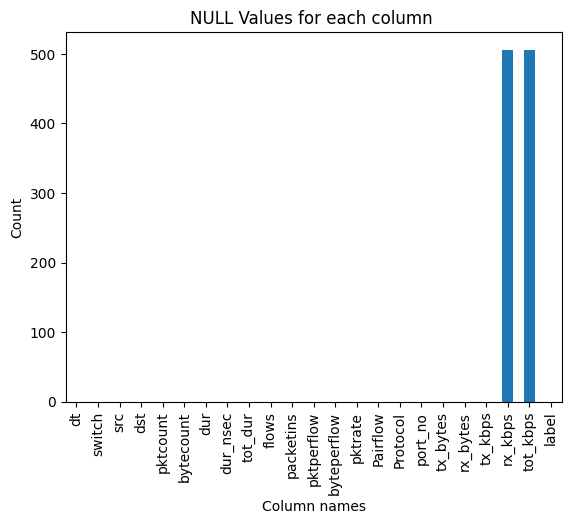

In [7]:
# Null values sum
df.isnull().sum().plot.bar()
plt.title("NULL Values for each column ")
plt.xlabel("Column names")
plt.ylabel("Count")

In [8]:
df=df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103839 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   src          103839 non-null  object 
 3   dst          103839 non-null  object 
 4   pktcount     103839 non-null  int64  
 5   bytecount    103839 non-null  int64  
 6   dur          103839 non-null  int64  
 7   dur_nsec     103839 non-null  int64  
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  int64  
 10  packetins    103839 non-null  int64  
 11  pktperflow   103839 non-null  int64  
 12  byteperflow  103839 non-null  int64  
 13  pktrate      103839 non-null  int64  
 14  Pairflow     103839 non-null  int64  
 15  Protocol     103839 non-null  object 
 16  port_no      103839 non-null  int64  
 17  tx_bytes     103839 non-null  int64  
 18  rx_bytes     103839 non-null 

In [10]:
# Getting unique destination
uniq_dest=df['dst'].unique()
total_dst=len(uniq_dest)
print("Total destination : ", total_dst)
print("Different destination : ",uniq_dest)

Total destination :  18
Different destination :  ['10.0.0.8' '10.0.0.7' '10.0.0.3' '10.0.0.5' '10.0.0.10' '10.0.0.13'
 '10.0.0.1' '10.0.0.11' '10.0.0.2' '10.0.0.4' '10.0.0.9' '10.0.0.6'
 '10.0.0.14' '10.0.0.15' '10.0.0.12' '10.0.0.16' '10.0.0.17' '10.0.0.18']


Text(0.5, 1.0, 'Traffic for normal and Malicious traffic')

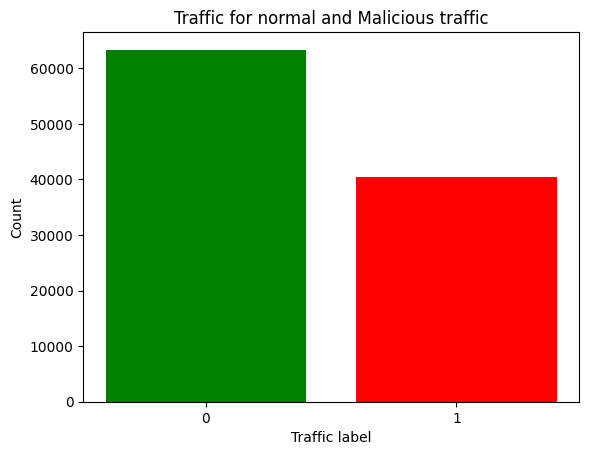

In [11]:
# Doing analysis for malicious and normal traffic
gp=df.groupby('label')['label'].count()
plt.bar(list(gp.index),list(gp.values),color=['g','r'])
plt.xticks(list(gp.index))
plt.xlabel("Traffic label")
plt.ylabel("Count")
plt.title("Traffic for normal and Malicious traffic")

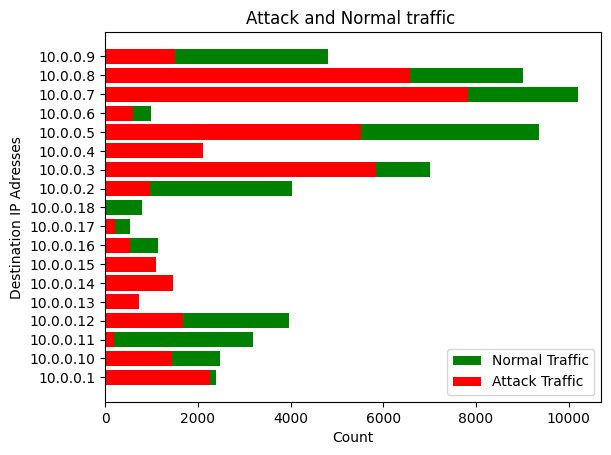

In [12]:
ip_addr=df[df['label']==0].groupby('dst').count()['label'].index
normal_traffic=df.groupby(['dst','label']).size().unstack().fillna(0)[0]
attack_traffic=df.groupby(['dst','label']).size().unstack().fillna(0)[1]
plt.barh(ip_addr,normal_traffic,color='g', label='Normal Traffic')
plt.barh(ip_addr,attack_traffic,color='r', label='Attack Traffic')
plt.legend()
plt.xlabel("Count")
plt.ylabel("Destination IP Adresses")
plt.title("Attack and Normal traffic ")
plt.savefig('static/attack_normal_traffic.png')

In [13]:
# Columns containing object(string) type data
# Port no column also does not do much so ignoring it also
object_col= list(df.select_dtypes(include=['object']).columns)
object_col=object_col+['port_no']
print(object_col)
data=df.drop(columns=object_col)

# seperating data based on protocol
udp_df = df[df['Protocol']=='UDP'].drop(columns=object_col)
tcp_df = df[df['Protocol']=='TCP'].drop(columns=object_col)
icmp_df = df[df['Protocol']=='ICMP'].drop(columns=object_col)
icmp_df

['src', 'dst', 'Protocol', 'port_no']


,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
46116,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,5327,5327,0,0.0,0.0,0
46117,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,5457,3104,0,0.0,0.0,0
46118,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,3227,3185,0,0.0,0.0,0
46119,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,3357,1122,0,0.0,0.0,0
46120,26657,8,20,1960,21,43000000,2.104300e+10,3,10,0,0,0,1,5327,5327,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,15209,12720,1,1.0,2.0,0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,15099,14693,1,1.0,2.0,0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,3409,3731,0,0.0,0.0,0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,15209,12720,1,1.0,2.0,0


## II. Data Model building

In [14]:
# importin modules for train test split
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture

### GMM

#### UDP Protocol

In [15]:
# splitting traing and testing data
udp_train,udp_test, udp_train_label, udp_test_label= train_test_split(udp_df[udp_df.columns[:-1]],udp_df['label'],test_size=0.3,random_state=42)

gmm= GaussianMixture(n_components=1)
gmm.fit(udp_train)
print("GMM Accuracy training data : ",metrics.accuracy_score(udp_train_label, gmm.predict(udp_train)))
print("GMM Accuracy testing data : ", metrics.accuracy_score(udp_test_label,gmm.predict(udp_test)))

GMM Accuracy training data :  0.47661614198730406
GMM Accuracy testing data :  0.4862468513853904


C:\Users\Rushikesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Rushikesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Rushikesh\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rushikesh\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_f

#### TCP Protocol

In [16]:
# splitting traing and testing data
tcp_train,tcp_test, tcp_train_label, tcp_test_label= train_test_split(tcp_df[tcp_df.columns[:-1]],tcp_df['label'],test_size=0.3,random_state=42)

gmm= GaussianMixture(n_components=2)
gmm.fit(tcp_train)
print("GMM Accuracy training data : ",metrics.accuracy_score(tcp_train_label, gmm.predict(tcp_train)))
print("GMM Accuracy testing data : ", metrics.accuracy_score(tcp_test_label,gmm.predict(tcp_test)))

GMM Accuracy training data :  0.3870905120116477
GMM Accuracy testing data :  0.39146189559506284


#### ICMP Protocol

In [17]:
# splitting traing and testing data
icmp_train,icmp_test, icmp_train_label, icmp_test_label= train_test_split(icmp_df[icmp_df.columns[:-1]],icmp_df['label'],test_size=0.3,random_state=42)

# GMM model

gmm= GaussianMixture(n_components=2)
gmm.fit(icmp_train)
print("GMM Accuracy training data : ",metrics.accuracy_score(icmp_train_label, gmm.predict(icmp_train)))
print("GMM Accuracy testing data : ", metrics.accuracy_score(icmp_test_label,gmm.predict(icmp_test)))

GMM Accuracy training data :  0.0725003457336468
GMM Accuracy testing data :  0.07880938936839559


##### As we can see accuracy is not good for GMM model

## Linear Perceptron

In [18]:
from sklearn.linear_model import Perceptron

#### UDP

In [19]:
model = Perceptron(random_state=67)
model.fit(udp_train,udp_train_label)
model.score(udp_train,udp_train_label)

0.47665932547393874

#### TCP

In [20]:
model = Perceptron(random_state=1)
model.fit(tcp_train,tcp_train_label)
model.score(tcp_train,tcp_train_label)

0.5268624120359137

#### ICMP


In [21]:
model = Perceptron(random_state=1)
model.fit(icmp_train,icmp_train_label)
model.score(icmp_train,icmp_train_label)

0.7722998202185036

## Multi-Layer perceptron

In [22]:
from sklearn.neural_network import MLPClassifier

#### UDP

In [23]:
clf= MLPClassifier(hidden_layer_sizes=(16,10),
                  random_state=5,
                  learning_rate_init=0.01)
clf.fit(udp_train,udp_train_label)
metrics.accuracy_score(clf.predict(udp_test), udp_test_label)

0.9414609571788413

#### TCP

In [24]:
clf= MLPClassifier(hidden_layer_sizes=(18,12),
          random_state=5,
          learning_rate_init=0.01)
clf.fit(tcp_train,tcp_train_label)
print(metrics.accuracy_score(clf.predict(tcp_test), tcp_test_label))

0.6394519306986751


#### ICMP

In [25]:
clf= MLPClassifier(hidden_layer_sizes=(16,10),
                  random_state=5,
                  learning_rate_init=0.01)
clf.fit(icmp_train,icmp_train_label)
metrics.accuracy_score(clf.predict(icmp_test), icmp_test_label)

0.999919335323062

## KNN

In [26]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

#### UDP

In [27]:
# Create feature and target arrays
X = udp_train
y = udp_train_label


knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X, y)

# Calculate the accuracy of the model
print(knn.score(udp_test, udp_test_label))


0.9621158690176322


#### TCP

In [28]:
X = tcp_train
y = tcp_train_label


knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X, y)

# Calculate the accuracy of the model
print(knn.score(tcp_test, tcp_test_label))

0.7990035103612275


#### ICMP

In [29]:
X = icmp_train
y = icmp_train_label


knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X, y)

# Calculate the accuracy of the model
print(knn.score(icmp_test, icmp_test_label))

0.9244978623860611


## SVM

In [30]:
from sklearn import svm

#### UDP

In [31]:
clf= svm.SVC(kernel='poly')
clf.fit(udp_train,udp_train_label)
clf.score(udp_test,udp_test_label)

0.6605541561712847

#### TCP

In [32]:
clf= svm.SVC()
clf.fit(tcp_train,tcp_train_label)
metrics.accuracy_score(clf.predict(tcp_test),tcp_test_label)

0.6720643188766844

#### ICMP

In [33]:
clf= svm.SVC()
clf.fit(icmp_train,icmp_train_label)
metrics.accuracy_score(clf.predict(icmp_test),icmp_test_label)

0.7991449544244575

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

#### UDP

In [35]:
# create regressor object
udp_rf = RandomForestRegressor()

# fit the regressor with x and y data
udp_rf.fit(udp_train,udp_train_label)
predi = udp_rf.predict(udp_test)
accuracy_score(predi.round(), udp_test_label)

1.0

Text(0, 0.5, 'Importance ')

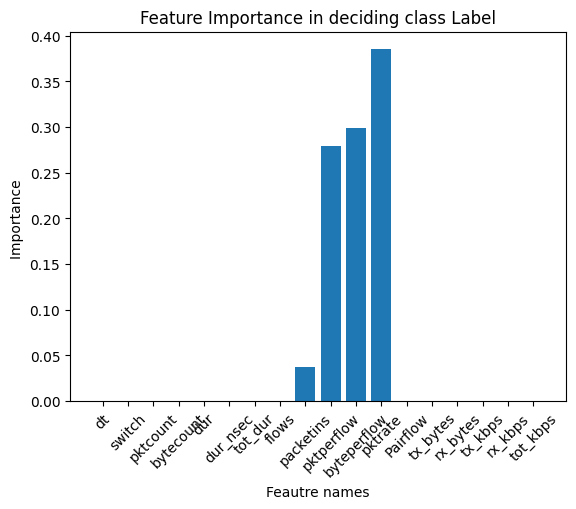

In [36]:
#
plt.bar(udp_df.columns[:-1], udp_rf.feature_importances_)
plt.xticks(rotation=45)
plt.title("Feature Importance in deciding class Label")
plt.xlabel("Feautre names")
plt.ylabel("Importance ")

#### TCP

In [37]:
# create regressor object
tcp_rf = RandomForestRegressor()

# fit the regressor with x and y data
tcp_rf.fit(tcp_train,tcp_train_label)
predi = tcp_rf.predict(tcp_test)
accuracy_score(predi.round(), tcp_test_label)

0.9996602876231457

Text(0, 0.5, 'Importance ')

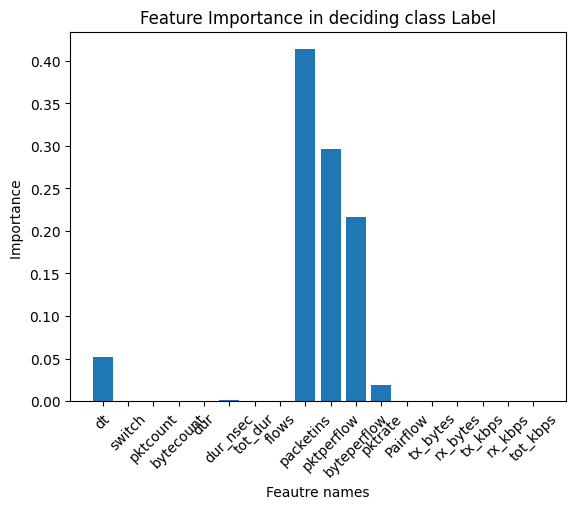

In [38]:
plt.bar(tcp_df.columns[:-1], tcp_rf.feature_importances_)
plt.xticks(rotation=45)
plt.title("Feature Importance in deciding class Label")
plt.xlabel("Feautre names")
plt.ylabel("Importance ")

#### ICMP

In [39]:
# create regressor object
icmp_rf = RandomForestRegressor()

# fit the regressor with x and y data
icmp_rf.fit(icmp_train,icmp_train_label)
accuracy_score(icmp_rf.predict(icmp_test).round(), icmp_test_label)

1.0

Text(0, 0.5, 'Importance ')

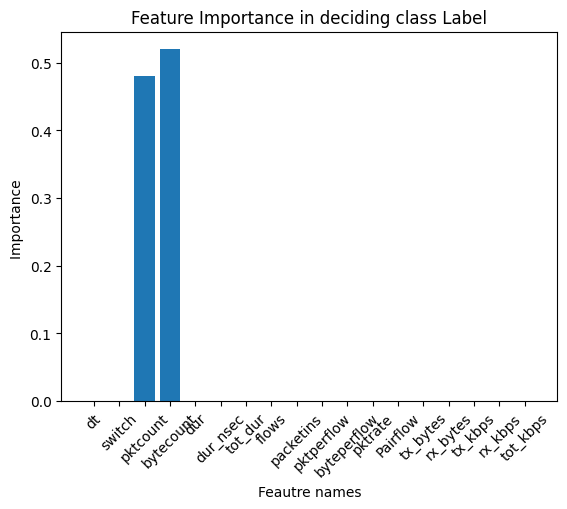

In [40]:
plt.bar(icmp_df.columns[:-1], icmp_rf.feature_importances_)
plt.xticks(rotation=45)
plt.title("Feature Importance in deciding class Label")
plt.xlabel("Feautre names")
plt.ylabel("Importance ")


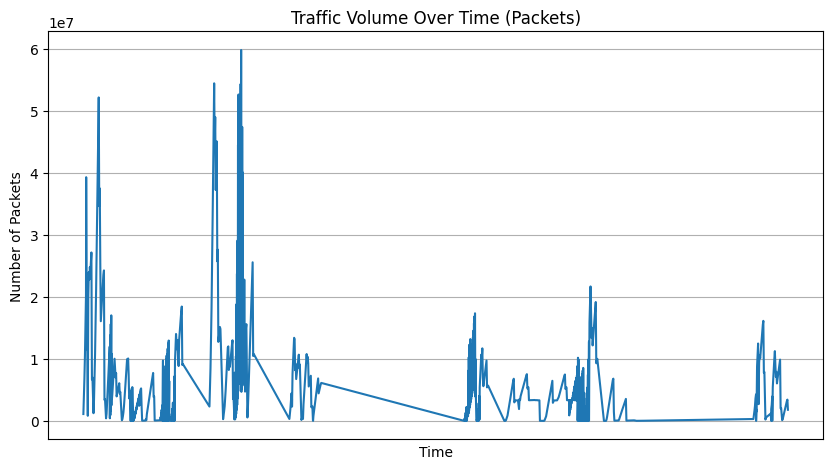

In [41]:
df['dt'] = pd.to_datetime(df['dt'], errors='coerce')

# Plot traffic volume over time
plt.figure(figsize=(10, 6))
df.groupby('dt')['pktcount'].sum().plot()
plt.title('Traffic Volume Over Time (Packets)')
plt.xlabel('Time')
plt.ylabel('Number of Packets')
plt.grid(True)
plt.savefig('static/traffic_volume_over_time.png')
plt.show()

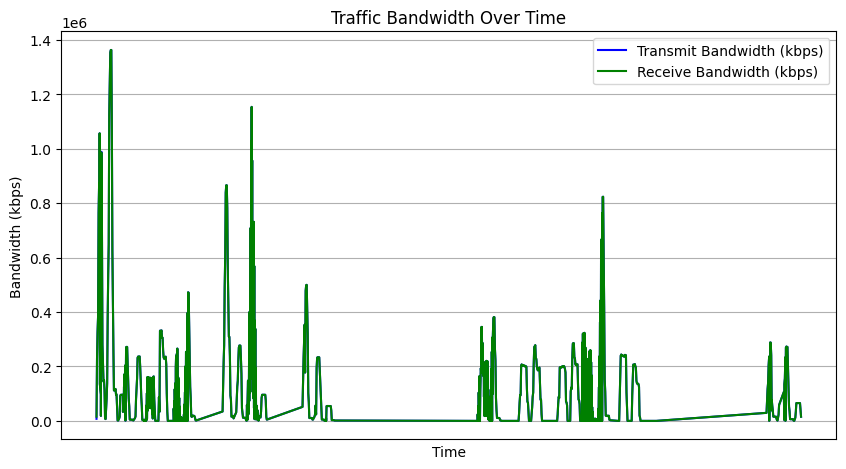

In [42]:
# Plotting transmit and receive bandwidth over time
plt.figure(figsize=(10, 6))
df.groupby('dt')['tx_kbps'].sum().plot(label='Transmit Bandwidth (kbps)', color='blue')
df.groupby('dt')['rx_kbps'].sum().plot(label='Receive Bandwidth (kbps)', color='green')
plt.title('Traffic Bandwidth Over Time')
plt.xlabel('Time')
plt.ylabel('Bandwidth (kbps)')
plt.legend()
plt.grid(True)
plt.savefig('static/traffic_bandwidth_over_time.png')
plt.show()



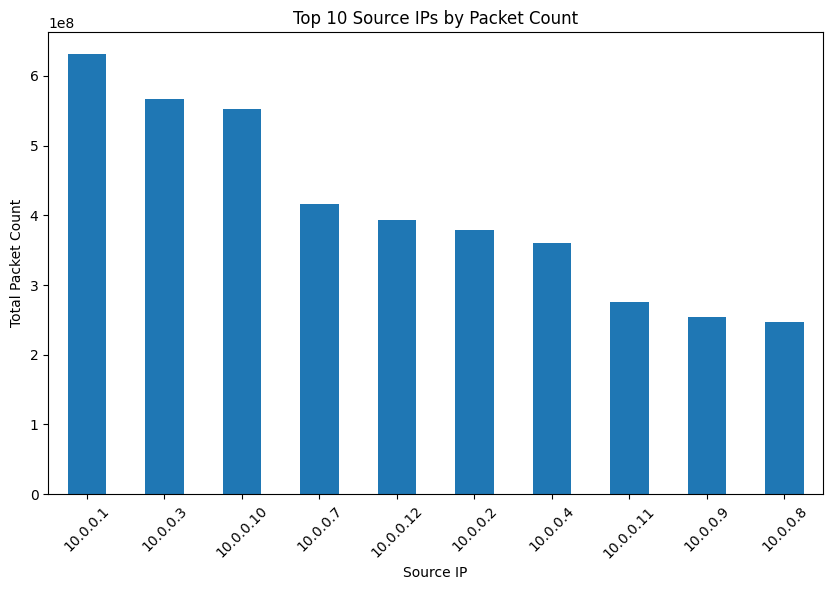

In [43]:
# Top 10 source IPs based on packet count
top_sources = df.groupby('src')['pktcount'].sum().nlargest(10)

# Plotting the top 10 source IPs
plt.figure(figsize=(10, 6))
top_sources.plot(kind='bar')
plt.title('Top 10 Source IPs by Packet Count')
plt.xlabel('Source IP')
plt.ylabel('Total Packet Count')
plt.xticks(rotation=45)
plt.savefig('static/source_ip_packet_count.png')
plt.show()
